# Inkscape G-Code Laser Numpy

## Test Setup

# Code:

In [3]:
import GCode
import GRBL
import numpy as np
import os
import sys
from time import sleep
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
cnc = GRBL.GRBL(port="/dev/cnc_3018")
cnc.laser_mode = 1

ok


In [5]:
def init():
    program = GCode.GCode()
    program.G0(F=500)
    program.G1(F=300)
    program.M3(S=1)
    program.G28()
    program.G21() # Metric Units
    program.G90() # Absolute positioning.
    program.G92(X=0, Y=0)
    return program

In [6]:
cnc.run("G28")

0.104248046875

In [61]:
cnc.run(prog)

92.31557559967041

In [7]:
cnc.status

'<Idle|MPos:-255.900,-136.000,-1.000|Bf:15,127|FS:0,0|Ov:100,100,100>'

In [10]:
266.7-11.7

255.0

In [16]:
X0 = 11.7
Xf = 255
Y0 = 89/2

dX=1

X=np.arange(X0, Xf, dX)
X

array([ 11.7,  11.8,  11.9, ..., 254.7, 254.8, 254.9])

In [25]:
prog=GCode.GCode()
prog.G28()
prog.G0(X=X[0], Y=0)
draw = True
prog.M4(S=255)
for y in np.arange(0, 89, 0.1):
    y=np.round(y, 4)
    if draw:
        prog.G1(Y=y, F=300)
    else:
        prog.G0(Y=y, F=300)
    
    draw = not draw
    
prog.M5()
prog.G28()

In [26]:
cnc.run(prog)

96.73859405517578

In [29]:
prog=GCode.GCode()
prog.G28()

prog.G0(X=X[0], Y=Y0)
draw = True
prog.M4(S=255)
for x in np.arange(X[0], X[-1], 2.5):
    x=np.round(x, 4)
    if draw:
        prog.G1(X=x, F=100)
    else:
        prog.G0(X=x, F=1000)
    
    draw = not draw
    
prog.M5()
prog.G28()

In [31]:
cnc.run(prog)

114.17742848396301

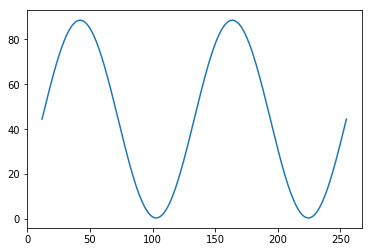

In [36]:
cycles=2
f = (cycles*2*np.pi)/(X[-1]-X[0])

A=88/2
Y=A*np.sin((X-X[0])*f)+Y0
_ = plt.plot(X, Y)

In [46]:
prog=GCode.GCode()
prog.G28()
prog.G0(X=X[0], Y=Y[0])

prog.M4(S=255)
for x, y in zip(X, Y):
    prog.G1(X=np.round(x, 4), Y=np.round(y, 4), F=400)
prog.M5()
prog.G28()

In [47]:
cnc.run(prog)

265.69346594810486

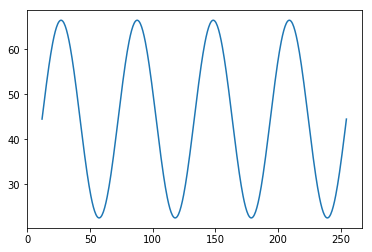

In [63]:
X0 = 11.7
Xf = 255
Y0 = 89/2

dX=0.5

X=np.arange(X0, Xf, dX)

cycles=4
f = (cycles*2*np.pi)/(X[-1]-X[0])

A=88/4
Y=A*np.sin((X-X[0])*f)+Y0
_ = plt.plot(X, Y)

In [64]:
prog=GCode.GCode()
prog.G28()
prog.G0(X=X[0], Y=Y[0])

prog.M4(S=255)
for x, y in zip(X, Y):
    prog.G1(X=np.round(x, 4), Y=np.round(y, 4), F=400)
prog.M5()
prog.G28()

In [65]:
cnc.run(prog)

73.57672715187073

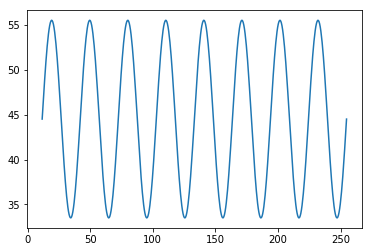

In [68]:
X0 = 11.7
Xf = 255
Y0 = 89/2

dX=0.5

X=np.arange(X0, Xf, dX)

cycles=8
f = (cycles*2*np.pi)/(X[-1]-X[0])

A=88/8
Y=A*np.sin((X-X[0])*f)+Y0
_ = plt.plot(X, Y)

In [69]:
prog=GCode.GCode()
prog.G28()
prog.G0(X=X[0], Y=Y[0])

prog.M4(S=255)
for x, y in zip(X, Y):
    prog.G1(X=np.round(x, 4), Y=np.round(y, 4), F=400)
prog.M5()
prog.G28()

In [70]:
cnc.run(prog)

76.28939032554626